Using the power series method, we want to find two linearly independent solutions to the Airy equation $y''(z) = zy(z)$ by assuming the solution is a power series centered at the origin. Let
\begin{equation}
    y(z) = \sum_{n=0}^\infty a_nz^n.
\end{equation}
First, we differentiate this series twice with respect to $z$
\begin{align}
    y'(z) &= \sum_{n=1}^\infty na_nz^{n-1}, \\
    y''(z) &= \sum_{n=2}^\infty n(n-1)a_nz^{n-2}.
\end{align}
Now, we substitute all these series back into the Airy equation,
\begin{align}
    \sum_{n=2}^\infty n(n-1)a_nz^{n-2} = \sum_{n=0}^\infty a_nz^{n+1}.
\end{align}
Reindexing,
\begin{equation}
    \sum_{k=0}^\infty (k+2)(k+1)a_{k+2}z^k = \sum_{k=1}^\infty a_{k-1}z^k.
\end{equation}
Equating coefficients, for $k = 0$, since it only appears on the LHS, we have $a_2 = 0$. Otherwise, for $k \geq 1$,
\begin{equation}
    a_{k+2} = \frac{a_{k-1}}{(k+2)(k+1)}.
\end{equation}
This can be written in terms of $n$ as
\begin{equation}
    a_{n+3} = \frac{a_n}{(n+3)(n+2)}
\end{equation}
for $n \geq 0$. The first two coefficients $a_0$ and $a_1$ correspond to the two initial conditions $y(0)$ and $y'(0)$ and can be chosen arbitrarily. Now,
\begin{align}
    a_3 &= a_0 / 3! \\
    a_4 &= (2a_1) / 4! \\
    a_5 &= 0 \\
    a_6 &= (1 \cdot 4)a_0 / 6! \\
    a_7 &= (2 \cdot 5)a_1 / 7! \\
    a_8 &= 0
\end{align}
Observe that all coefficients $a_{3m+2}$ are zero. We can now write the full series solution by grouping the terms dependent on $a_0$ and $a_1$,
\begin{equation}
    y(z) = a_0 + a_1z + a_2z^2 + \cdots = (a_0 + a_3z^3 + a_6z^6 + \cdots) + (a_1z + a_4z^4 + a_7z^7 + \cdots)
\end{equation}
and substituting the expressions we found yields
\begin{equation}
    y(z) = a_0\left(1 + \frac{1}{3!}z^3 + \frac{1 \cdot 4}{6!}z^6 + \cdots \right) + a_1 \left(z + \frac{2}{4!}z^4 + \frac{2 \cdot 5}{7!}z^7 + \cdots\right).
\end{equation}
We see that our two fundamental series solutions $Ai(z)$ and $Bi(z)$ are precisely $f(z)$ and $g(z)$. Thus, the general solution to the Airy equation is
\begin{equation}
    y(z) = a_0 f(z) + a_1 g(z)
\end{equation}
where $a_0 = y(0)$ and $a_1 = y'(0)$.

For $Ai(z)$, the initial conditions are $Ai(0) = \alpha$ and $Ai'(0) = -\beta$. Therefore, we set $a_0 = \alpha$ and $a_1 = -\beta$ which gives
\begin{equation}
    Ai(z) = \alpha f(z) - \beta g(z).
\end{equation}
For $Bi(z)$, the initial conditions are $Bi(0) = \sqrt{3}\alpha$ and $Bi'(0) = \sqrt{3}\beta$. Therefore, we set $a_0 = \sqrt{3}\alpha$ and $a_1 = \sqrt{3}\beta$ which gives
\begin{equation}
    Bi(z) = \sqrt{3}(\alpha f(z) + \beta g(z)),
\end{equation}
as required.

---

A much quicker, and more accurate, approach to evaluating the Airy functions is to avoid numerical integration altogether and instead use the analytic series expansions. In theory, the Maclaurin series for $Ai$ and $Bi$ are valid for all $z$, but in practice they are not very helpful for larger values of $|z|$ because of rounding errors caused by adding together large numbers of terms.

Here we will try an approach based on using the Maclaurin series when $|z| < b$, for some fixed constant $b$, and using the asymptotic expansion when $|z| \geq b$.

In [27]:
import numpy as np
from scipy.special import gamma
from scipy.special import airy
import matplotlib.pyplot as plt

ALPHA = 1 / (3**(2/3) * gamma(2/3))
BETA = 1 / (3**(1/3) * gamma(1/3))

def ai_maclaurin(z, max_terms=10, tol=1e-15):
    '''
    Computes Ai(z) using the Maclaurin series.
    '''
    # Sum f(z) = 1 + z^3/3! + (1*4)z^6/6! + ...
    f_term = 1.0
    f_sum = 1.0
    for n in range(1, max_terms):
        f_term *= z**3 * (3*n - 2) / ((3*n) * (3*n - 1))
        if abs(f_term) < tol: break
        f_sum += f_term

    # Sum g(z) = z + 2z^4/4! + (2*5)z^7/7! + ...
    g_term = z
    g_sum = z
    for n in range(1, max_terms):
        g_term *= z**3 * (3*n - 1) / ((3*n + 1) * (3*n))
        if abs(g_term) < tol: break
        g_sum += g_term

    return ALPHA * f_sum - BETA * g_sum

def ai_asymptotic_two_terms(z):
    '''
    Computes Ai(z) using the first two terms of the F(z) expansion.
    '''
    if z == 0: return np.nan
    z_3_2 = z**1.5
    xi = (2/3) * z_3_2
    # F(z) ~ (1/sqrt(pi) * z^(-1/4) * exp(-xi)) * (1 - 5/(48*z^(3/2)))
    # Ai(z) ~ 0.5 * F(z)
    factor = 1 - 5 / (48 * z_3_2)
    return 0.5 * (1 / np.sqrt(np.pi)) * (z**(-0.25)) * np.exp(-xi) * factor

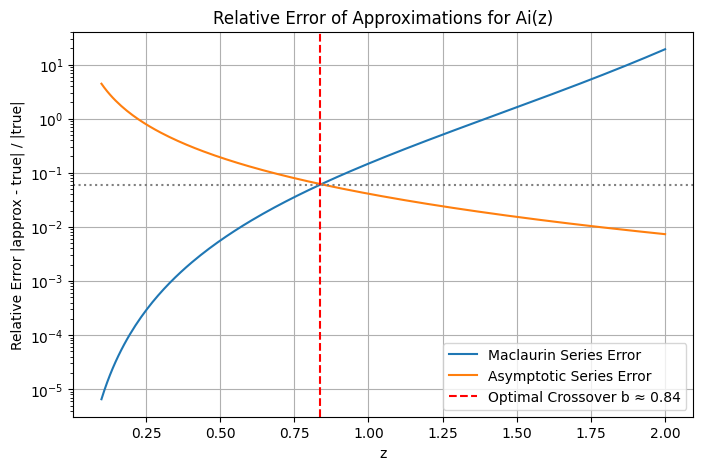

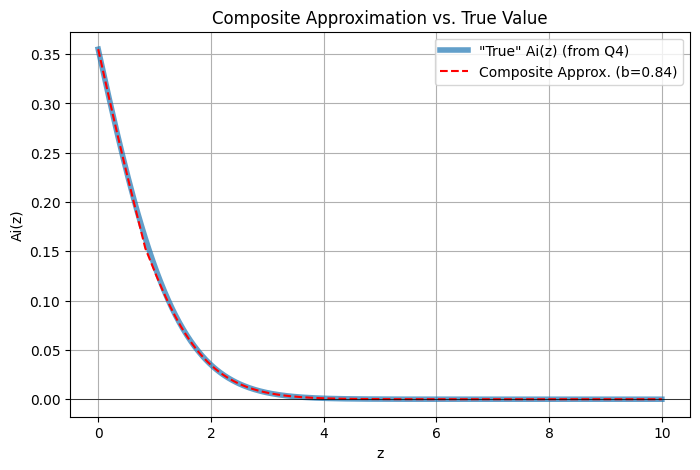


Sample values close to z = b ≈ 0.8352
   z   |   Method Used   |   Approx Value   |   True Value   
-------|-----------------|------------------|----------------
  0.64 |    Maclaurin    |       0.19908623 |       0.20239332 
  0.84 |   Asymptotic    |       0.15319358 |       0.16337328 
  1.04 |   Asymptotic    |       0.12487439 |       0.12977778 


In [28]:
z_range = np.linspace(0.1, 2, 200)
ai_true = np.array([airy(z)[0] for z in z_range])
ai_mac = np.array([ai_maclaurin(z) for z in z_range])
ai_asy = np.array([ai_asymptotic_two_terms(z) for z in z_range])

error_mac = np.abs((ai_mac - ai_true) / ai_true)
error_asy = np.abs((ai_asy - ai_true) / ai_true)

idx = np.argwhere(np.diff(np.sign(error_mac - error_asy))).flatten()
crossover_z = z_range[idx][0]
crossover_error = error_mac[idx][0]

plt.figure(figsize=(8, 5))
plt.plot(z_range, error_mac, label='Maclaurin Series Error')
plt.plot(z_range, error_asy, label='Asymptotic Series Error')
plt.axvline(crossover_z, color='r', linestyle='--', label=f'Optimal Crossover b ≈ {crossover_z:.2f}')
plt.axhline(crossover_error, color='gray', linestyle=':')
plt.yscale('log')
plt.title('Relative Error of Approximations for Ai(z)')
plt.xlabel('z')
plt.ylabel('Relative Error |approx - true| / |true|')
plt.legend()
plt.grid(True)
plt.show()

b = crossover_z
def ai_composite(z):
    if z < b:
        return ai_maclaurin(z).real
    else:
        return ai_asymptotic_two_terms(z).real

z_plot = np.linspace(0, 10, 300)
ai_comp_vals = [ai_composite(z) for z in z_plot]
ai_true_vals = [airy(z)[0] for z in z_plot]

plt.figure(figsize=(8, 5))
plt.plot(z_plot, ai_true_vals, label='"True" Ai(z) (from Q4)', linewidth=4, alpha=0.7)
plt.plot(z_plot, ai_comp_vals, 'r--', label=f'Composite Approx. (b={b:.2f})')
plt.title('Composite Approximation vs. True Value')
plt.xlabel('z')
plt.ylabel('Ai(z)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

print(f"\nSample values close to z = b ≈ {b:.4f}")
print("   z   |   Method Used   |   Approx Value   |   True Value   ")
print("-------|-----------------|------------------|----------------")
for z_val in [b - 0.2, b, b + 0.2]:
    method = "Maclaurin" if z_val < b else "Asymptotic"
    value = ai_composite(z_val)
    true_value = airy(z_val)[0]
    print(f" {z_val:5.2f} | {method:^15} | {value:16.8f} | {true_value:16.8f} ")

The Maclaurin series evaluation involves a simple loop that runs about $20$-$30$ times for $z$ near $b$. The asymptotic expansion is a direct calculation with a fixed (and small) number of arithmetic operations. Both are very fast in terms of time complexity, especially compared to a numerical ODE solver which must take thousands of tiny steps along the integration path to maintain accuracy.